In [4]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
df = pd.read_excel('C:/Users/1/Documents/Project/New_data/new_df_director.xlsx', index = False)

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(df,0.2)

# make X_train and Y_train

copy_train_set = train_set.copy()
copy_train_set['ln_Budget'] = np.log(copy_train_set['Budget'])
attributes = (
    [
#         "Len_genres",
#         "Len_country",
        "ln_Budget", 
#         "Len_production_co", 
        "Run_time",
#         "Age_rating",
        "Ex_year_writer",
        "Ex_year_director"
    ]
)
scaler = StandardScaler()
sample_for_predict = copy_train_set[attributes]
scaler.fit(sample_for_predict)
X_train = scaler.transform(sample_for_predict)
condition = (
    [
        (copy_train_set['Imdb_rating'] > 7.5)
    ]
)
choice = [1]
y_train = np.select(condition, choice)

# make X_test and Y_test

copy_test_set = test_set.copy()
copy_test_set['ln_Budget'] = np.log(copy_test_set['Budget'])
sample_for_test = copy_test_set[attributes]
scaler.fit(sample_for_test)
X_test = scaler.transform(sample_for_test)

condition = (
    [
        (copy_test_set['Imdb_rating'] > 7.5)
    ]
)
y_test = np.select(condition, choice)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [1]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

# n_estimators 

train_acc = []
test_acc = []
trees_grid = [int(x) for x in np.linspace(start = 1 , stop = 100, num = 100)]

for ntrees in tqdm(trees_grid):
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1)
    rfc.fit(X_train, y_train)
    train_acc.append(rfc.score(X_train, y_train))
    test_acc.append(rfc.score(X_test, y_test))
    
train_acc, test_acc  = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy is {:.3f}% with {} trees".format(max(test_acc), 
                                                        trees_grid[np.argmax(test_acc)]))


plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.85,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

100%|██████████| 200/200 [01:24<00:00,  2.38it/s]


Best accuracy on CV is 0.91% with 5 max_depth


Text(0.5,0,'Min_samples_leaf')

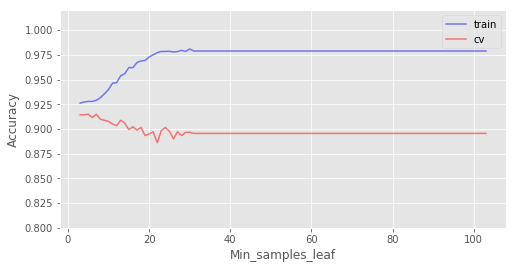

In [9]:
# max_depth

train_acc = []
test_acc = []
max_depth_grid = [int(x) for x in np.linspace(3, 103, num = 200)]

for max_depth in tqdm(max_depth_grid):
    rfc = RandomForestClassifier(n_estimators=3, random_state=42, n_jobs=-1, max_depth=max_depth)
    rfc.fit(X_train, y_train)
    train_acc.append(rfc.score(X_train, y_train))
    test_acc.append(rfc.score(X_test, y_test))

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc), 
                                                        max_depth_grid[np.argmax(test_acc)]))



fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.80,1.02])

ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

In [8]:
X_train

array([[ 0.53545517,  0.96638883,  2.28008484, -0.64110011],
       [ 0.73896301, -0.37416918, -0.04756572, -0.30401725],
       [-0.4094667 , -0.47728903,  3.33810783,  0.70723131],
       ...,
       [ 0.72119944, -1.35380772, -0.25917032, -0.64110011],
       [ 0.72119944,  0.96638883, -0.47077491, -0.64110011],
       [ 1.2833184 , -0.4257291 , -0.47077491,  2.05556273]])

In [9]:
X_test

array([[ 0.54031798, -0.48809624,  0.94335418,  1.69132799],
       [-0.00836129, -0.95140634,  1.55311873,  1.02032359],
       [-0.83612553,  0.07817166,  1.95962843,  1.35582579],
       ...,
       [-0.05043145, -0.23070174, -0.47942976, -0.65718743],
       [ 0.54031798,  0.28408726, -0.47942976, -0.65718743],
       [ 0.66839875, -0.59105404, -0.47942976, -0.65718743]])

In [10]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [11]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [13]:

# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

rf = RandomForestClassifier(n_estimators = 48, max_depth = 5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



print('Правильность на обучающем наборе: {:.3f}'.format(rf.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf.score(X_test, y_test)))
print('Точность на обучающем наборе: {:.3f}'.format(precision_score(y_test, y_pred)))

Правильность на обучающем наборе: 0.918
Правильность на тестовом наборе: 0.908
Точность на обучающем наборе: 0.500


In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
roc_auc_score(y_test,y_pred)

0.5027077268294113

In [28]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')